# Tuberculosis(TB) CHEST X-RAY DATABASE

Distribución del dataset:

- 700 casos de pacientes con manifestación de tuberculosis
- 3500 casos normales 

Atributos 

- Género
- Edad
- Indica la anormalidad(Sano o Enfermo con Manifestación de Tuberculosis) 


In [1]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
#Función para graficar los datasets
def graficar_dataset(dataset, tamano_x = 8, tamano_y = 10, columnas = 3, filas = 3, ancho_max_txt=20):
    figure = plt.figure(figsize=(tamano_x, tamano_y))
    cols, rows = columnas, filas
    total_datos = len(dataset.path)
    for i in range(1, cols * rows + 1):
        sample_idx = int(random.random()*total_datos)
        img = mpimg.imread(dataset.iloc[sample_idx].path)
        condicion = dataset.iloc[sample_idx].condition
        len_condicion = len(condicion)
        if len_condicion > ancho_max_txt:
            condicion_list = list(condicion)
            for iterador in range(ancho_max_txt, len_condicion, ancho_max_txt):
                condicion_list[condicion.find(" ", iterador - 5)] = "\n"
            condicion = ''.join(condicion_list)
        label = "{}".format(condicion)
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    return plt

## Obtener los nombres de la lista de elementos

In [13]:
direccion_dataset = "/media/josejacomeb/Datos1/DatasetsMédicos/TB_Chest_Radiography_Database/" #Poner la dirección del dataset aquí
ruta_imagenes_tb= os.path.join(direccion_dataset, "Tuberculosis/")
ruta_imagenes_normales = os.path.join(direccion_dataset, "Normal/")
extension_cxr = "png"
lista_elementos_tb = os.listdir(ruta_imagenes_tb)
lista_elementos_normal = os.listdir(ruta_imagenes_normales)

datos = [] 

condicion_paciente="tuberculosis"
for elemento in lista_elementos_tb:
    ruta_elemento_cxr = os.path.join(ruta_imagenes_tb, elemento)
    datos.append({"path": ruta_elemento_cxr,  "condition": condicion_paciente})
condicion_paciente="normal"
for elemento in lista_elementos_normal:
    ruta_elemento_cxr = os.path.join(ruta_imagenes_normales, elemento)
    datos.append({"path": ruta_elemento_cxr,  "condition": condicion_paciente})

panda_datos = pd.DataFrame(datos) #Convertir a formato Pandas


## Estadísticas de los Datos
### Descripción de los datos

In [14]:
panda_datos.describe()

,path,condition
count,4200,4200
unique,4200,2
top,/media/josejacomeb/Datos1/DatasetsMédicos/TB_C...,normal
freq,1,3500


### Primeros  cinco datos

In [15]:
panda_datos.head()

,path,condition
0,/media/josejacomeb/Datos1/DatasetsMédicos/TB_C...,tuberculosis
1,/media/josejacomeb/Datos1/DatasetsMédicos/TB_C...,tuberculosis
2,/media/josejacomeb/Datos1/DatasetsMédicos/TB_C...,tuberculosis
3,/media/josejacomeb/Datos1/DatasetsMédicos/TB_C...,tuberculosis
4,/media/josejacomeb/Datos1/DatasetsMédicos/TB_C...,tuberculosis


### Distribución por Enfermedad

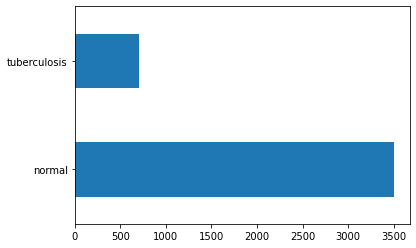

In [16]:
series_condition = panda_datos["condition"].value_counts()
matplot_condicion = series_condition.plot.barh()

## Visualización de todos los datos

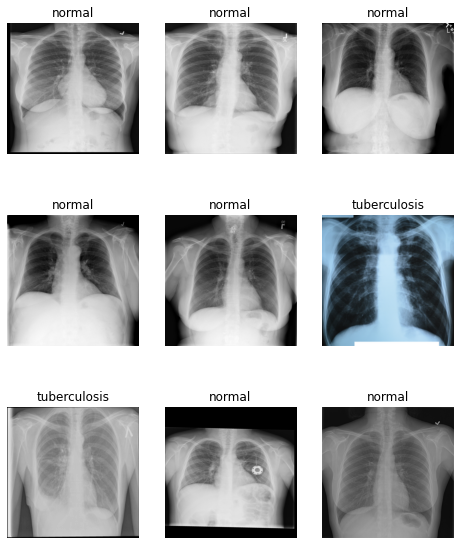

In [17]:
plt = graficar_dataset(panda_datos)
plt.show()

### Filtrar por Condición
### Normal

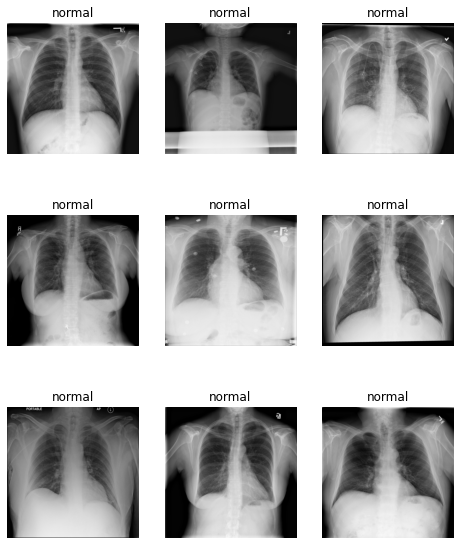

In [18]:
dataset_normal = panda_datos[panda_datos.condition == "normal"]
plt = graficar_dataset(dataset_normal)
plt.show()

### Con enfermedad

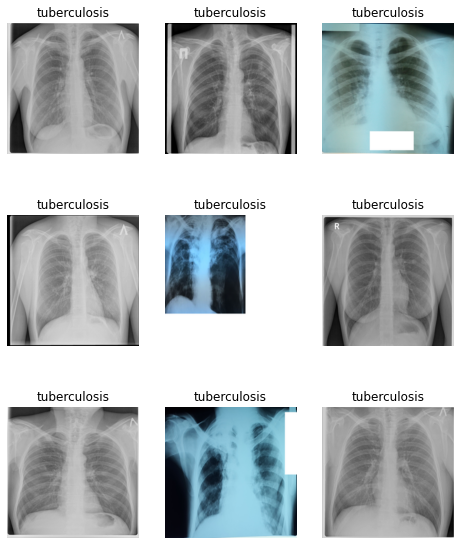

In [19]:
dataset_enfermedad = panda_datos[panda_datos.condition != "normal"]
plt = graficar_dataset(dataset_enfermedad)
plt.show()

In [20]:
series_condition = panda_datos["condition"].value_counts()

In [21]:
series_condition

normal          3500
tuberculosis     700
Name: condition, dtype: int64